<h2><font color="gray">Muhammet Eren KÜÇÜK</font></center></h2>


<h1 style="color: firebrick; font-family: verdana"><b>Problem Definition</b></h1>

<p style="font-family: verdana"><b>Neural networks</b> are algorithms created explicitly to simulate biological neural networks. Neural networks are modeled after the human brain, as the main idea behind neural networks is to make a machine think like a human. A neural network consists of interconnected <b>neurons</b> that maintain the information flow in the system.</p>

<p style="font-family: verdana">In image recognition applications, a regular (fully connected) neural network is not preferred due to the large amounts of neurons necessary to build the network, and the fact that objects tend to have different transformations in different images. The same neural network model might not observe the same objects as included in the same class. Instead of gathering each pixel of the image to classify an object, we simply can <b>extract abstract features that're useful for classification from the object</b>. For instance, if we want an object to be classify as a bird; we can extract features like claws, wings and beak for classification, instead of checking every single pixel. This is done by building <b>convolutional neural networks (CNNs)</b>.</p>

<p style="font-family: verdana">For our assignment, we have a dataset that consists of approximately <b>20,000 vegetable images</b>. About 15,000 of these images are under the train subset, while 3,000 images each are assigned for the validation and test subsets. These images belong to <b>15 classes (species) of vegetables</b>. Our objective is to design two types of neural networks to classify the vegetable objects in these images.</p>

<p style="font-family: verdana">In Part 1, we'll implement a <b>single layer neural network</b> and observe the results in different parameters. Then, we'll implement a <b>neural network with one hidden layer</b>. Finally, we need to implement another <b>neural network with two hidden layers</b> and report the results to observe how different parameters affect the neural network's metrics.</p>

<p style="font-family: verdana">In Part 2, while building a <b>convolutional neural network</b>, we'll use and finetune a <b>pretrained VGG-19 CNN</b> in two different cases. In the first case, we'll finetune the weights of all layers in the VGG-19 CNN. In the second case, we'll finetune only the two last fully connected layers in the same network.</p>

<p style="font-family: verdana">In both parts, we must extract confusion matrices to observe and analyze the metrics. We also need to measure our error values using the <b>early stopping</b> method <b>every 10 epoch</b>. Early stopping is the practice of halting the training process once the model performance stops improving on the validation set to prevent <b>overfitting</b>. We specify an arbitrary number of <b>training epochs (usually 8 or 10, 10 in this assignment's case)</b> and check if the model performance stopped improving in each epoch.</p>

<h1 style="color: firebrick; font-family: verdana"><b>Multi Layer Neural Network</b></h1>

<p style="font-family: verdana">We'll build a multi layer neural network for classification in this section of the assignment. <b>One input layer, n hidden layer(s), and one output layer</b> will assemble the created neural network. With the loss function, we'll implement both forward and backward. As indicated in the assignment's PDF, we'll also use a <b>back-propagation</b> approach to build a neural network. Additionally, we'll compare the parameters of the neural network we'll build when changing them, determine which model is the best, and make comments on the parameter settings.</p>

<h2 style="color: firebrick; font-family: verdana"><b>1.1: Python Implementation</b></h2>

<p style="font-family: verdana">First, we'll import the required libraries in order to run our program.</p>

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import os
import cv2
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.utils import shuffle
from tabulate import tabulate

<p style="font-family: verdana">We'll open our dataset folder with the listdir() function. Then, we'll open the train, test and validation folders in our dataset folder and add the image files inside the folders to the lists. We'll create 2 lists for each folder for images and labels. Next, we'll create separate dataframe objects for train test and validation. </p>

In [3]:
# First we open our folder with listdir
# Then, we open the train test validation folders in our folder
# Afterwards, add the image files inside the folders to the lists
# We create 2 lists for each folder for images and labels
folder_names = os.listdir('Vegetable Images')
train_label, test_label, valid_label, train_file, test_file, valid_file = [], [], [], [], [], [],
for k, folder in enumerate(folder_names):
    inner_folder = os.listdir('Vegetable Images/' + folder)
    for j, veg_folder in enumerate(inner_folder):
        inner_file = os.listdir('Vegetable Images/' + folder + "/" + veg_folder)
        for file in inner_file:
            if folder == "test":
                test_file.append("Vegetable Images/" + folder + "/" + veg_folder + "/" + file)
                test_label.append(j)
            elif folder == "train":
                train_file.append("Vegetable Images/" + folder + "/" + veg_folder + "/" + file)
                train_label.append(j)
            elif folder == "validation":
                valid_file.append("Vegetable Images/" + folder + "/" + veg_folder + "/" + file)
                valid_label.append(j)

# Next, we create separate dataframes for train test and validation
df_train = pd.DataFrame({
    'vegetable_name': train_file,
    'vegetable_label': train_label
})

df_test = pd.DataFrame({
    'vegetable_name': test_file,
    'vegetable_label': test_label
})

df_val = pd.DataFrame({
    'vegetable_name': valid_file,
    'vegetable_label': valid_label
})

<p style="font-family: verdana">With a getTrainTestValid() function, we'll convert our dataframes into the required image and label data. In the getTrainTestValid() function we'll first read and convert the images to grayscale, then resize and flatten them. Then, we'll shuffle the labels and indexes and return 2 different numpy arrays with images and labels. The result is two numpy arrays each for train, test and validation subsets.</p>

In [4]:
# With getTrainTestValid function we convert our dataframes into image and label data.
# In the getTrainTestValid function we first read the images, convert them to grayscale, resize and flatten them.
# Then we shuffle the labels and indexes and return 2 different numpy arrays with images and labels.
def getTrainTestValid(df):
    images = []
    for i, file_path in enumerate(df.vegetable_name.values):
        img = cv2.imread(file_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (32, 32))
        img = img.flatten() / 255
        images.append(img)

    y = df['vegetable_label']
    label_num = len(y)

    # idx_rand = np.random.choice(range(label_num), label_num, replace=False)
    idx_rand = np.random.permutation(label_num)
    y = shuffle(y)
    names_list = []
    labels_list = []
    for i in range(label_num):
        names_list.append(images[idx_rand[i]])
        labels_list.append(y[idx_rand[i]])

    return np.array(names_list), np.array(labels_list)


# We get two numpy arrays each for train test and validation.
x_train, y_train = getTrainTestValid(df_train)
x_test, y_test = getTrainTestValid(df_test)
x_val, y_val = getTrainTestValid(df_val)

<p style="font-family: verdana">First; we'll take the number of data, label and hidden layer as definite parameters in our neural network. The rest of the parameters have default values because they are the parameters that we can change. The parameters are <b>activation function, number of classes, learning rate, hidden layer size, batch size and epoch value</b>.</p>

In [5]:
# In our neural network, first of all, we take the number of data, label and hidden layer as definite parameters.
# The rest of the parameters have default values because they are the parameters that we can change.
# The remaining parameters are activation function, number of classes, learning rate, hidden layer size, batch size and epoch value.
class NeuralNetwork(object):
    def __init__(self, train_names, train_labels, n_hidden_layers, size_hidden_layer=128, batch_size=32, epoch=101,
                 activation="relu", n_classes=15, learning_rate=0.001):
        self.X = train_names
        self.y = train_labels
        self.number_of_hidden_layers = n_hidden_layers
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.epoch = epoch
        self.n_classes = n_classes
        self.size_hl = size_hidden_layer

        self.size_step = 5e-2
        self.regularization = 1e-3
        self.weight = []
        self.bias = []
        self.hl_score = []
        self.activation = activation

    # initialize last layer
    def last_layer(self):
        self.softmax_weights = np.random.randn(self.size_hl, self.n_classes)
        self.softmax_weights /= 100
        arr1 = []
        for i in range(0, self.n_classes):
            arr1.append(0.)
        arr2 = [arr1]
        biases = np.array(arr2)
        self.softmax_biases = biases

    # initialize hidden_layer
    def hidden_layer(self, n_inputs):
        weights = np.random.randn(n_inputs, self.size_hl)
        self.weight.append(weights * 1 / 100)
        arr1 = []
        for i in range(0, self.size_hl):
            arr1.append(0.)
        arr2 = [arr1]
        biases = np.array(arr2)
        self.bias.append(biases)

    def softmax(self, scores):
        # numerical stability
        numerator = np.exp(scores - np.max(scores, axis=1, keepdims=True))
        denumerator = np.sum(numerator, axis=1, keepdims=True)
        res = numerator / denumerator
        return res

    def relu(self, data):
        res = data.copy()
        res[res < 0] = 0
        return res

    def sigmoid(self, data):
        denum = 1 + np.exp(-1 * data)
        return np.reciprocal(denum)

    def tanh(self, data):
        return np.tanh(data)

    def negativeloglikelihood(self, X, y):
        res = -1 * np.log(X + 1e-230)
        one_hot_y = np.zeros((y.size, 15))
        one_hot_y[np.arange(y.shape[0]), y] = 1
        return round(np.sum(one_hot_y * res) / 100, 7)

    def create_batch(self, batch_size=32):
        mini_batches = []
        no_of_batches = self.X.shape[0] // batch_size
        i = 0

        for i in range(no_of_batches):
            batch_idx_first = i * batch_size
            batch_idx_end = (i + 1) * batch_size
            X_mini = self.X[batch_idx_first:batch_idx_end]
            Y_mini = self.y[batch_idx_first:batch_idx_end]
            mini_batches.append((X_mini, Y_mini))

        if self.X.shape[0] % batch_size != 0:
            X_mini = self.X[(i + 1) * batch_size:]
            Y_mini = self.y[(i + 1) * batch_size:]
            mini_batches.append((X_mini, Y_mini))

        return mini_batches

    def backward(self, score):
        weight_list = []
        bias_list = []
        n_hl = self.number_of_hidden_layers
        weight_softmax = np.dot(self.hl_score[n_hl].transpose(), score)
        bias_softmax = np.sum(score, axis=0, keepdims=True)
        val_softmax = np.dot(score, self.softmax_weights.transpose())
        val_softmax[self.hl_score[n_hl] <= 0] = 0

        for i in range(self.number_of_hidden_layers):
            n_hl -= 1
            weight_list.insert(0, np.dot(self.hl_score[n_hl].transpose(), val_softmax))
            bias_list.insert(0, np.sum(val_softmax, axis=0, keepdims=True))
            val_softmax = np.dot(val_softmax, self.weight[n_hl].transpose())
            val_softmax[self.hl_score[n_hl] <= 0] = 0

        weight_softmax += self.regularization * self.softmax_weights
        for i in range(len(weight_list)):
            weight_list[i] += self.regularization * self.weight[i]

        for i in range(len(self.weight)):
            self.weight[i] += -self.size_step * weight_list[i]
            self.bias[i] += -self.size_step * bias_list[i]
        self.softmax_weights += -self.size_step * weight_softmax
        self.softmax_biases += -self.size_step * bias_softmax

    def gradient(self, X, y, data):
        X = self.X
        y = self.y
        grad_val = np.dot(X, data)
        grad_val = np.dot(X.transpose(), (grad_val - y))
        return grad_val

    def cost(self, X, y, data):
        X = self.X
        y = self.y
        cost = np.dot(X, data)
        cost_val = np.dot((cost - y).transpose(), (cost - y))
        cost_val /= 2
        return cost_val[0]

    def gradientDescent(self, learning_rate=0.001, batch_size=32):
        theta = np.zeros((self.X.shape[1], 1))
        error_list = []
        max_iters = 3
        for itr in range(max_iters):
            mini_batches = self.create_batch(batch_size)
            for mini_batch in mini_batches:
                X_mini, y_mini = mini_batch
                theta = theta - learning_rate * self.gradient(X_mini, y_mini, theta)
                error_list.append(self.cost(X_mini, y_mini, theta))

        return theta, error_list

    def train(self, plot_suffix):
        for i in range(self.number_of_hidden_layers):
            if i == 0:
                self.hidden_layer(32 * 32)
            else:
                self.hidden_layer(self.size_hl)
        self.last_layer()
        batch_count = self.create_batch(self.batch_size)
        train_acc = []
        n_epoch = []
        train_loss = []
        for epoch_count in range(self.epoch):
            acc_bool = True
            loss_bool = True
            for batch in batch_count:
                batch_data = batch[0]
                batch_labels = batch[1]
                self.hl_score = []
                self.hl_score.append(batch_data)
                for i in range(self.number_of_hidden_layers):
                    if i == 0:
                        if self.activation == "relu":
                            target = self.relu(np.dot(batch_data, self.weight[i]) + self.bias[i])
                            self.hl_score.append(target)
                        elif self.activation == "sigmoid":
                            target = self.sigmoid(np.dot(batch_data, self.weight[i]) + self.bias[i])
                            self.hl_score.append(target)
                        elif self.activation == "tanh":
                            target = self.tanh(np.dot(batch_data, self.weight[i]) + self.bias[i])
                            self.hl_score.append(target)
                    else:
                        if self.activation == "relu":
                            target = self.relu(np.dot(target, self.weight[i]) + self.bias[i])
                            self.hl_score.append(target)
                        elif self.activation == "sigmoid":
                            target = self.sigmoid(np.dot(target, self.weight[i]) + self.bias[i])
                            self.hl_score.append(target)
                        elif self.activation == "tanh":
                            target = self.tanh(np.dot(target, self.weight[i]) + self.bias[i])
                            self.hl_score.append(target)
                target = np.dot(target, self.softmax_weights) + self.softmax_biases
                predictions = self.softmax(target)
                if loss_bool:
                    loss_bool = False
                if acc_bool and epoch_count % 10 == 0:
                    predicted_class = np.argmax(predictions, axis=1)
                    loss_value = self.negativeloglikelihood(predictions, batch_labels)
                    train_loss.append(loss_value)
                    n_epoch.append(epoch_count)
                    acc = (np.mean(predicted_class == batch_labels))
                    print("#################################")
                    print("Epoch", epoch_count, "/", self.epoch - 1)
                    print("loss ", loss_value)
                    print("training accuracy: ", acc)
                    train_acc.append(acc)
                    prec = precision_score(batch_labels, predicted_class, zero_division=1, average="weighted")
                    recall = recall_score(batch_labels, predicted_class, zero_division=1, average="weighted")
                    fscore = f1_score(batch_labels, predicted_class, zero_division=1, average="weighted")
                    print("Precision Score: ", prec)
                    print("Recall Score: ", recall)
                    print("F1 Score: ", fscore)
                    acc_bool = False
                back_prop = predictions
                back_prop[range(len(batch_labels)), batch_labels] -= 1
                back_prop /= len(batch_labels)
                self.backward(back_prop)
        train_loss = np.array(train_loss)
        train_acc = np.array(train_acc)
        epoch = np.array(n_epoch)
        # Make plot of train and valid accuracy
        # Set all features for plot
        plt.plot(epoch, train_acc)
        plt.title("Accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend(["Train Accuracy"], loc="lower right")
        plt.show()
        plt.plot(epoch, train_loss)
        plt.title("Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend(["Train Loss"], loc="lower right")
        plt.show()

    def test(self, test_set, test_label_set):
        for i in range(self.number_of_hidden_layers):
            if i == 0:
                if self.activation == "relu":
                    target = self.relu(np.dot(test_set, self.weight[i]) + self.bias[i])
                    self.hl_score.append(target)
                elif self.activation == "sigmoid":
                    target = self.sigmoid(np.dot(test_set, self.weight[i]) + self.bias[i])
                    self.hl_score.append(target)
                elif self.activation == "tanh":
                    target = self.tanh(np.dot(test_set, self.weight[i]) + self.bias[i])
                    self.hl_score.append(target)
            else:
                if self.activation == "relu":
                    target = self.relu(np.dot(target, self.weight[i]) + self.bias[i])
                    self.hl_score.append(target)
                elif self.activation == "sigmoid":
                    target = self.sigmoid(np.dot(target, self.weight[i]) + self.bias[i])
                    self.hl_score.append(target)
                elif self.activation == "tanh":
                    target = self.tanh(np.dot(target, self.weight[i]) + self.bias[i])
                    self.hl_score.append(target)
        target = np.dot(target, self.softmax_weights) + self.softmax_biases
        probabilities = self.softmax(target)
        predicted_class = np.argmax(probabilities, axis=1)
        loss_values = self.negativeloglikelihood(probabilities, test_label_set)
        acc = np.mean(predicted_class == test_label_set)
        loss_values /= 100
        print("Average Loss according to Each Epoch: ", loss_values)
        print("Average Test Accuracy according to Each Epoch: ", acc)
        return loss_values, acc

<h2 style="color: firebrick; font-family: verdana"><b>1.2: Parameter I - Hidden Layer Number</b></h2>

Effect of differences of number of hidden layers

Training of model 1 begins
#################################
Epoch 0 / 100
loss  0.8672957
training accuracy:  0.03125
Precision Score:  0.9697265625
Recall Score:  0.03125
F1 Score:  0.001893939393939394
#################################
Epoch 10 / 100
loss  0.516332
training accuracy:  0.5
Precision Score:  0.6734375
Recall Score:  0.5
F1 Score:  0.4308035714285714
#################################
Epoch 20 / 100
loss  0.3601045
training accuracy:  0.5625
Precision Score:  0.7578125
Recall Score:  0.5625
F1 Score:  0.527827380952381
#################################
Epoch 30 / 100
loss  0.2680851
training accuracy:  0.71875
Precision Score:  0.9010416666666666
Recall Score:  0.71875
F1 Score:  0.7394345238095237
#################################
Epoch 40 / 100
loss  0.2121743
training accuracy:  0.875
Precision Score:  0.9765625
Recall Score:  0.875
F1 Score:  0.8830357142857143
#################################
Epoch 50 / 100
loss  0

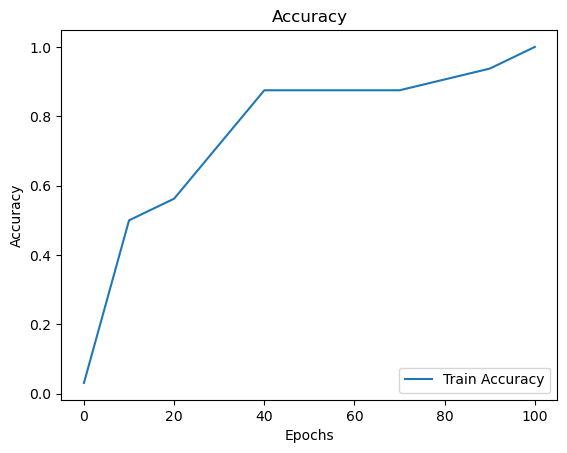

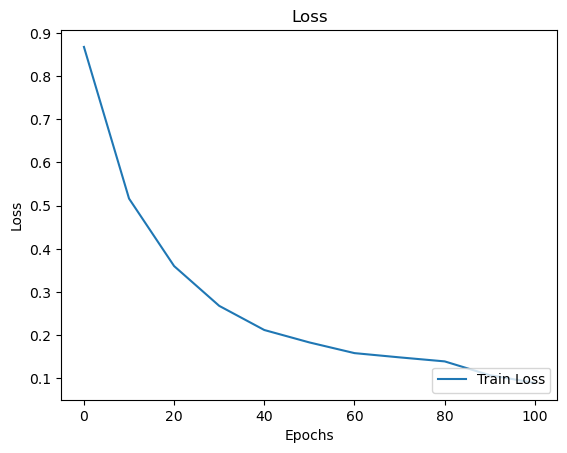

Training of model 1 is over
Average Loss and Average Test Accuracy values of model 1
Average Loss according to Each Epoch:  0.474441199
Average Test Accuracy according to Each Epoch:  0.563
0.47444
Training of model 2 begins
#################################
Epoch 0 / 100
loss  0.8665294
training accuracy:  0.03125
Precision Score:  0.9697265625
Recall Score:  0.03125
F1 Score:  0.001893939393939394
#################################
Epoch 10 / 100
loss  0.714907
training accuracy:  0.28125
Precision Score:  0.5678571428571428
Recall Score:  0.28125
F1 Score:  0.21170634920634918
#################################
Epoch 20 / 100
loss  0.5020264
training accuracy:  0.375
Precision Score:  0.496875
Recall Score:  0.375
F1 Score:  0.3491071428571429
#################################
Epoch 30 / 100
loss  0.3205161
training accuracy:  0.625
Precision Score:  0.8046875
Recall Score:  0.625
F1 Score:  0.6135416666666667
#################################
Epoch 40 / 100
loss  0.2083086
training a

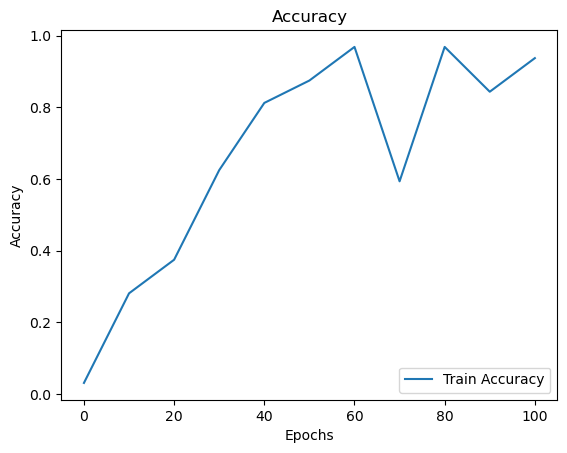

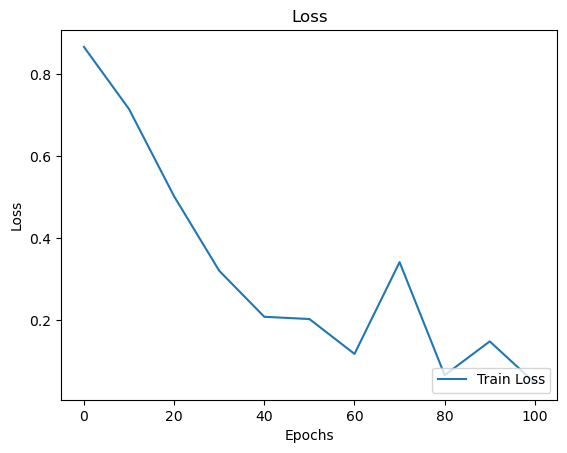

Training of model 2 is over
Average Loss and Average Test Accuracy values of model 2
Average Loss according to Each Epoch:  0.456666951
Average Test Accuracy according to Each Epoch:  0.6133333333333333


╒════════════════════════╤══════════╤══════════╕
│ models                 │   model1 │   model2 │
╞════════════════════════╪══════════╪══════════╡
│ Number of Hidden Layer │ 1        │ 2        │
├────────────────────────┼──────────┼──────────┤
│ Average Accuracy Value │ 0.563    │ 0.613333 │
├────────────────────────┼──────────┼──────────┤
│ Average Loss Value     │ 0.474441 │ 0.456667 │
╘════════════════════════╧══════════╧══════════╛



In [6]:
print("Effect of differences of number of hidden layers")
print()
model1 = NeuralNetwork(x_train, y_train, n_hidden_layers=1)
print("Training of model 1 begins")
model1.train("1 Hidden Layers")
print("Training of model 1 is over")
print("Average Loss and Average Test Accuracy values of model 1")
loss1, acc1 = model1.test(x_val, y_val)
print(round(loss1, 5))
###########################################################################
model2 = NeuralNetwork(x_train, y_train, n_hidden_layers=2)
print("Training of model 2 begins")
model2.train("2 Hidden Layers")
print("Training of model 2 is over")
print("Average Loss and Average Test Accuracy values of model 2")
loss2, acc2 = model2.test(x_val, y_val)
print()
print()
table = [['models', 'model1', 'model2'],
         ['Number of Hidden Layer', '1', '2'],
         ['Average Accuracy Value', acc1, acc2],
         ['Average Loss Value', loss1, loss2]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))
print()

<h2 style="color: firebrick; font-family: verdana"><b>1.3: Parameter II - Hidden Layer Size</b></h2>

Effect of differences of size of hidden layers

Training of model 3 begins
#################################
Epoch 0 / 100
loss  0.8666034
training accuracy:  0.0625
Precision Score:  0.7922794117647058
Recall Score:  0.0625
F1 Score:  0.018750000000000003
#################################
Epoch 10 / 100
loss  0.7533342
training accuracy:  0.1875
Precision Score:  0.5385416666666667
Recall Score:  0.1875
F1 Score:  0.10119047619047619
#################################
Epoch 20 / 100
loss  0.5673343
training accuracy:  0.375
Precision Score:  0.5958333333333333
Recall Score:  0.375
F1 Score:  0.2916666666666667
#################################
Epoch 30 / 100
loss  0.4154279
training accuracy:  0.59375
Precision Score:  0.7463541666666667
Recall Score:  0.59375
F1 Score:  0.5581845238095238
#################################
Epoch 40 / 100
loss  0.3128831
training accuracy:  0.65625
Precision Score:  0.7859375000000001
Recall Score:  0.65625
F1 Score:  0.6360119047619047
################

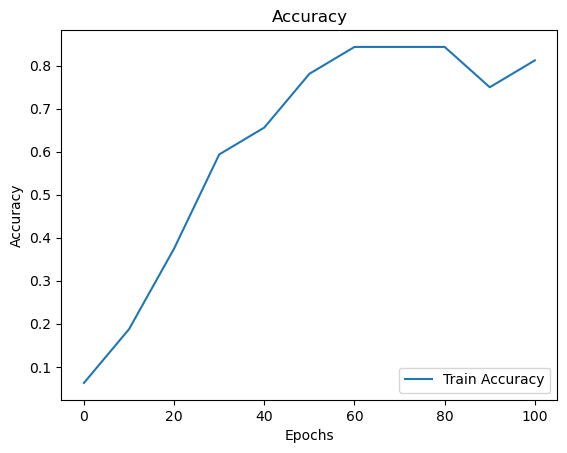

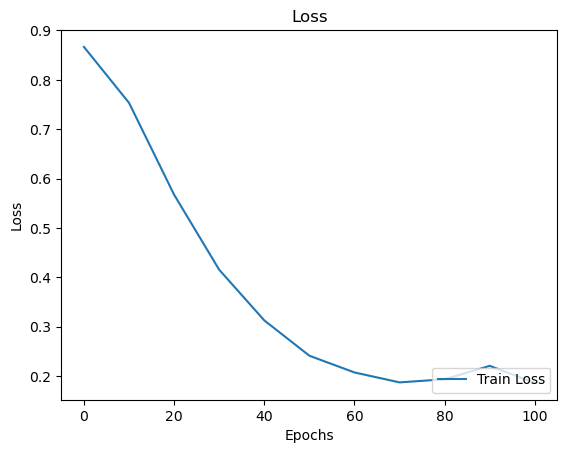

Training of model 3 is over
Average Loss and Average Test Accuracy values of model 3
Average Loss according to Each Epoch:  0.515275488
Average Test Accuracy according to Each Epoch:  0.5696666666666667
Training of model 4 begins
#################################
Epoch 0 / 100
loss  0.8666719
training accuracy:  0.0
Precision Score:  1.0
Recall Score:  0.0
F1 Score:  0.0
#################################
Epoch 10 / 100
loss  0.731156
training accuracy:  0.25
Precision Score:  0.4616071428571428
Recall Score:  0.25
F1 Score:  0.173015873015873
#################################
Epoch 20 / 100
loss  0.4928253
training accuracy:  0.4375
Precision Score:  0.5459821428571429
Recall Score:  0.4375
F1 Score:  0.4194444444444444
#################################
Epoch 30 / 100
loss  0.3311714
training accuracy:  0.59375
Precision Score:  0.8177083333333333
Recall Score:  0.59375
F1 Score:  0.5589285714285714
#################################
Epoch 40 / 100
loss  0.2363115
training accuracy:  0.

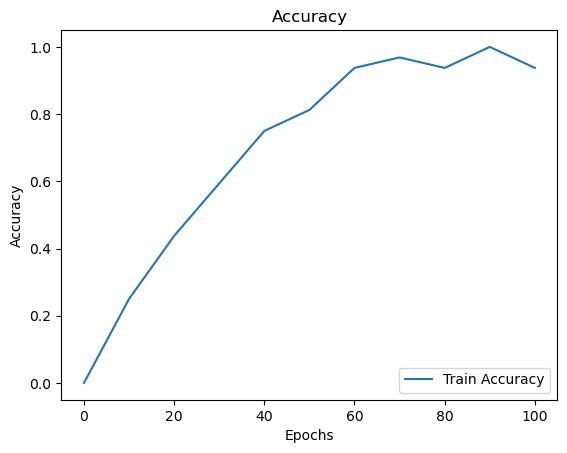

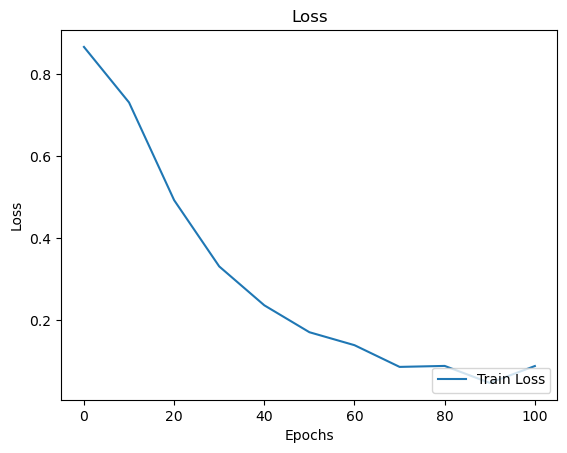

Training of model 4 is over
Average Loss and Average Test Accuracy values of model 4
Average Loss according to Each Epoch:  0.44404510700000005
Average Test Accuracy according to Each Epoch:  0.6326666666666667


╒════════════════════════╤═══════════╤════════════╕
│ models                 │    model1 │     model2 │
╞════════════════════════╪═══════════╪════════════╡
│ Size of Hidden Layer   │ 64        │ 128        │
├────────────────────────┼───────────┼────────────┤
│ Average Accuracy Value │  0.569667 │   0.632667 │
├────────────────────────┼───────────┼────────────┤
│ Average Loss Value     │  0.515275 │   0.444045 │
╘════════════════════════╧═══════════╧════════════╛



In [7]:
print("Effect of differences of size of hidden layers")
print()
model3 = NeuralNetwork(x_train, y_train, n_hidden_layers=2, size_hidden_layer=64)
print("Training of model 3 begins")
model3.train("Hidden Layer Size = 64")
print("Training of model 3 is over")
print("Average Loss and Average Test Accuracy values of model 3")
loss3, acc3 = model3.test(x_val, y_val)
###########################################################################
model4 = NeuralNetwork(x_train, y_train, n_hidden_layers=2, size_hidden_layer=128)
print("Training of model 4 begins")
model4.train("Hidden Layer Size = 128")
print("Training of model 4 is over")
print("Average Loss and Average Test Accuracy values of model 4")
loss4, acc4 = model4.test(x_val, y_val)
print()
print()
table = [['models', 'model1', 'model2'],
         ['Size of Hidden Layer', '64', '128'],
         ['Average Accuracy Value', acc3, acc4],
         ['Average Loss Value', loss3, loss4]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))
print()

<h2 style="color: firebrick; font-family: verdana"><b>1.4: Parameter III - Batch Size</b></h2>

Effect of differences of batch size

Training of model 5 begins
#################################
Epoch 0 / 100
loss  0.4332605
training accuracy:  0.125
Precision Score:  0.8291666666666666
Recall Score:  0.125
F1 Score:  0.029411764705882353
#################################
Epoch 10 / 100
loss  0.3439438
training accuracy:  0.0625
Precision Score:  0.34375
Recall Score:  0.0625
F1 Score:  0.041666666666666664
#################################
Epoch 20 / 100
loss  0.2131054
training accuracy:  0.625
Precision Score:  0.8958333333333333
Recall Score:  0.625
F1 Score:  0.625
#################################
Epoch 30 / 100
loss  0.1190598
training accuracy:  0.75
Precision Score:  0.953125
Recall Score:  0.75
F1 Score:  0.7648809523809523
#################################
Epoch 40 / 100
loss  0.1087596
training accuracy:  0.875
Precision Score:  1.0
Recall Score:  0.875
F1 Score:  0.875
#################################
Epoch 50 / 100
loss  0.0816557
training accuracy:  0.875
Precision

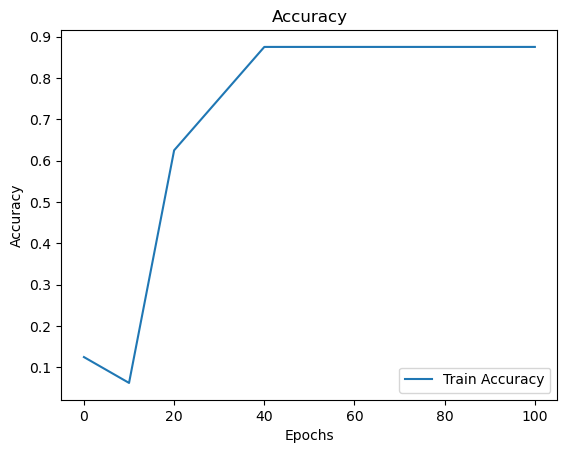

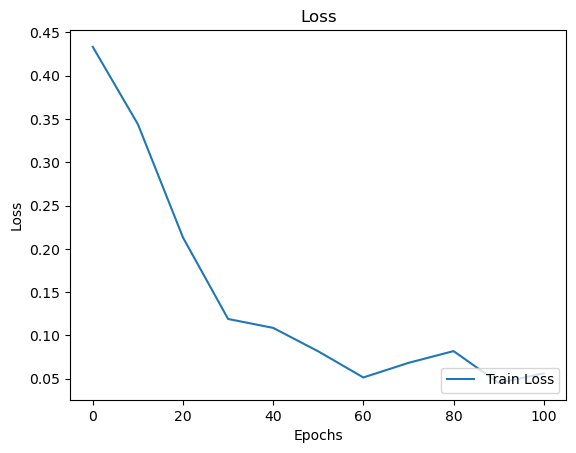

Training of model 5 is over
Average Loss and Average Test Accuracy values of model 5
Average Loss according to Each Epoch:  0.399946672
Average Test Accuracy according to Each Epoch:  0.652
Training of model 6 begins
#################################
Epoch 0 / 100
loss  0.8665052
training accuracy:  0.09375
Precision Score:  0.8675271739130435
Recall Score:  0.09375
F1 Score:  0.051923076923076926
#################################
Epoch 10 / 100
loss  0.7075777
training accuracy:  0.3125
Precision Score:  0.5791666666666667
Recall Score:  0.3125
F1 Score:  0.24836309523809524
#################################
Epoch 20 / 100
loss  0.4833683
training accuracy:  0.5
Precision Score:  0.6031249999999999
Recall Score:  0.5
F1 Score:  0.451686507936508
#################################
Epoch 30 / 100
loss  0.3429394
training accuracy:  0.625
Precision Score:  0.7125
Recall Score:  0.625
F1 Score:  0.596875
#################################
Epoch 40 / 100
loss  0.235694
training accuracy:  0.

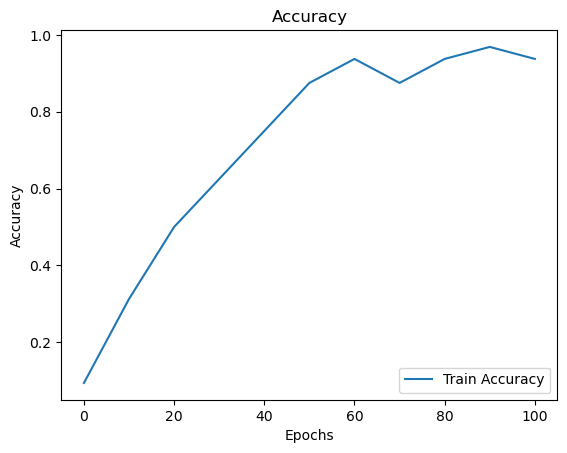

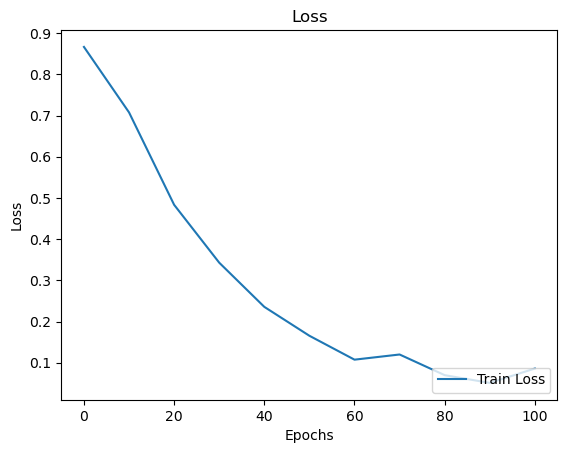

Training of model 6 is over
Average Loss and Average Test Accuracy values of model 6
Average Loss according to Each Epoch:  0.470150627
Average Test Accuracy according to Each Epoch:  0.5716666666666667
Training of model 7 begins
#################################
Epoch 0 / 100
loss  1.7330277
training accuracy:  0.09375
Precision Score:  0.7157561188811189
Recall Score:  0.09375
F1 Score:  0.04252645502645502
#################################
Epoch 10 / 100
loss  1.5691199
training accuracy:  0.15625
Precision Score:  0.4653852513227513
Recall Score:  0.15625
F1 Score:  0.13809094551282053
#################################
Epoch 20 / 100
loss  1.3040001
training accuracy:  0.40625
Precision Score:  0.5271298363095238
Recall Score:  0.40625
F1 Score:  0.37898264929514935
#################################
Epoch 30 / 100
loss  1.1508679
training accuracy:  0.421875
Precision Score:  0.6223958333333334
Recall Score:  0.421875
F1 Score:  0.39304021249648186
#################################

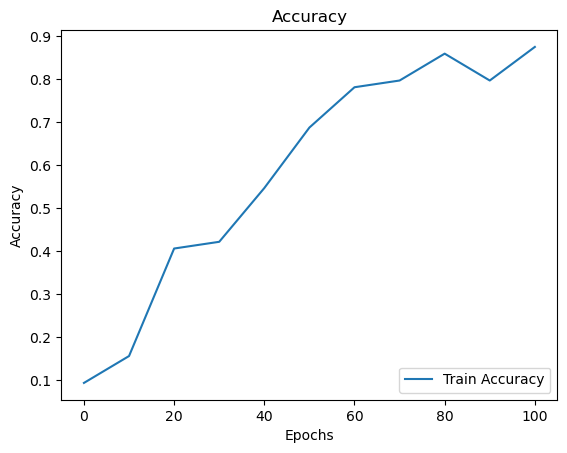

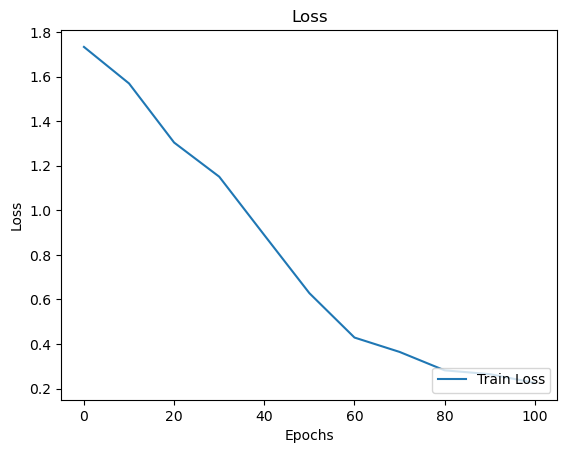

Training of model 7 is over
Average Loss and Average Test Accuracy values of model 7
Average Loss according to Each Epoch:  0.41396857
Average Test Accuracy according to Each Epoch:  0.618


╒════════════════════════╤═══════════╤═══════════╤═══════════╕
│ models                 │    model1 │    model2 │    model3 │
╞════════════════════════╪═══════════╪═══════════╪═══════════╡
│ Batch Size             │ 16        │ 32        │ 64        │
├────────────────────────┼───────────┼───────────┼───────────┤
│ Average Accuracy Value │  0.652    │  0.571667 │  0.618    │
├────────────────────────┼───────────┼───────────┼───────────┤
│ Average Loss Value     │  0.399947 │  0.470151 │  0.413969 │
╘════════════════════════╧═══════════╧═══════════╧═══════════╛



In [8]:
print("Effect of differences of batch size")
print()
model5 = NeuralNetwork(x_train, y_train, n_hidden_layers=2, batch_size=16)
print("Training of model 5 begins")
model5.train("Batch Size = 16")
print("Training of model 5 is over")
print("Average Loss and Average Test Accuracy values of model 5")
loss5, acc5 = model5.test(x_val, y_val)

model6 = NeuralNetwork(x_train, y_train, n_hidden_layers=2, batch_size=32)
print("Training of model 6 begins")
model6.train("Batch Size = 32")
print("Training of model 6 is over")
print("Average Loss and Average Test Accuracy values of model 6")
loss6, acc6 = model6.test(x_val, y_val)

model7 = NeuralNetwork(x_train, y_train, n_hidden_layers=2, batch_size=64)
print("Training of model 7 begins")
model7.train("Batch Size = 64")
print("Training of model 7 is over")
print("Average Loss and Average Test Accuracy values of model 7")
loss7, acc7 = model7.test(x_val, y_val)
print()
print()
table = [['models', 'model1', 'model2', 'model3'],
         ['Batch Size', '16', '32', '64'],
         ['Average Accuracy Value', acc5, acc6, acc7],
         ['Average Loss Value', loss5, loss6, loss7]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))
print()

<h2 style="color: firebrick; font-family: verdana"><b>1.5: Parameter IV - Activation Function</b></h2>

Effect of differences of activation function

Training of model 9 begins
#################################
Epoch 0 / 100
loss  0.8666327
training accuracy:  0.0625
Precision Score:  0.8798076923076923
Recall Score:  0.0625
F1 Score:  0.00892857142857143
#################################
Epoch 10 / 100
loss  0.7140534
training accuracy:  0.28125
Precision Score:  0.5647321428571428
Recall Score:  0.28125
F1 Score:  0.18611111111111112
#################################
Epoch 20 / 100
loss  0.5327566
training accuracy:  0.5
Precision Score:  0.5954613095238095
Recall Score:  0.5
F1 Score:  0.4441468253968254
#################################
Epoch 30 / 100
loss  0.4002418
training accuracy:  0.6875
Precision Score:  0.865625
Recall Score:  0.6875
F1 Score:  0.7075892857142858
#################################
Epoch 40 / 100
loss  0.2663759
training accuracy:  0.78125
Precision Score:  0.8776041666666666
Recall Score:  0.78125
F1 Score:  0.7779761904761905
#################################

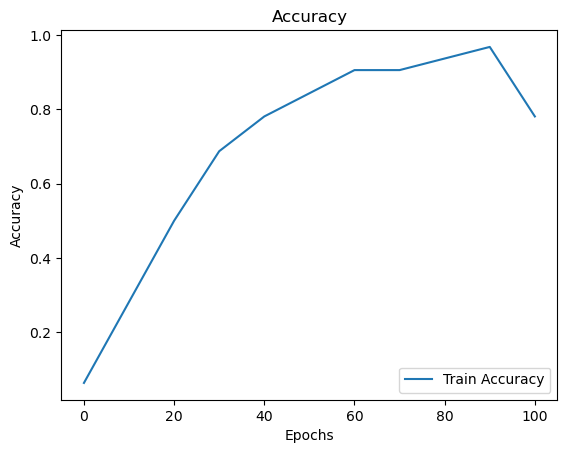

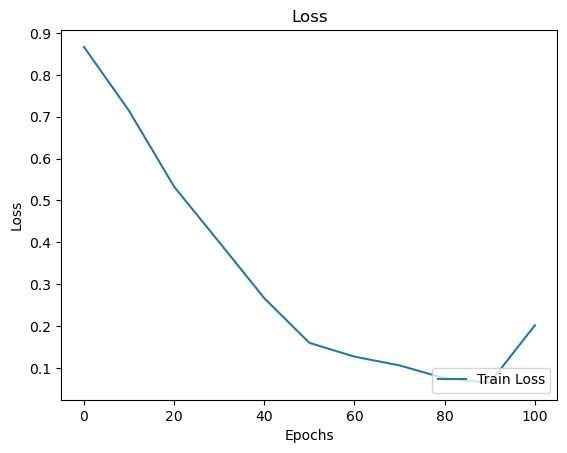

Training of model 9 is over
Average Loss and Average Test Accuracy values of model 9
Average Loss according to Each Epoch:  0.423025624
Average Test Accuracy according to Each Epoch:  0.649
Training of model 10 begins
#################################
Epoch 0 / 100
loss  0.8665244
training accuracy:  0.0625
Precision Score:  0.7767857142857143
Recall Score:  0.0625
F1 Score:  0.037500000000000006
#################################
Epoch 10 / 100
loss  0.7921212
training accuracy:  0.1875
Precision Score:  0.5366586538461539
Recall Score:  0.1875
F1 Score:  0.11911764705882352
#################################
Epoch 20 / 100
loss  0.7157116
training accuracy:  0.3125
Precision Score:  0.6517045454545454
Recall Score:  0.3125
F1 Score:  0.26264880952380953
#################################
Epoch 30 / 100
loss  0.68541
training accuracy:  0.28125
Precision Score:  0.40104166666666663
Recall Score:  0.28125
F1 Score:  0.25498737373737373
#################################
Epoch 40 / 100
loss

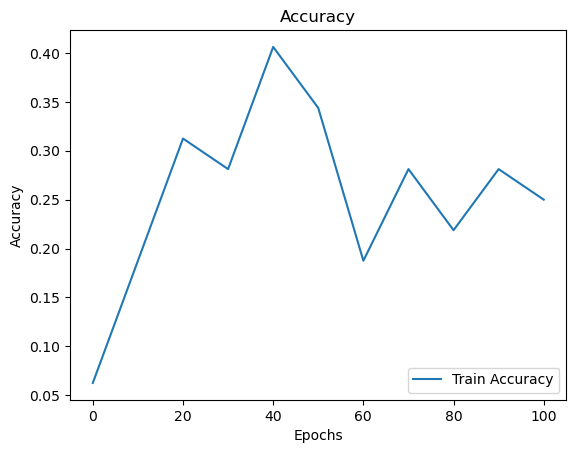

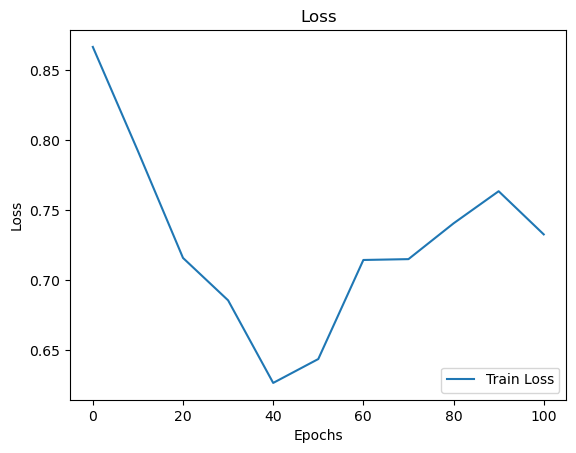

Training of model 10 is over
Average Loss and Average Test Accuracy values of model 10
Average Loss according to Each Epoch:  0.6810210050000001
Average Test Accuracy according to Each Epoch:  0.2806666666666667
Training of model 11 begins
#################################
Epoch 0 / 100
loss  0.866724
training accuracy:  0.03125
Precision Score:  0.9697265625
Recall Score:  0.03125
F1 Score:  0.001893939393939394
#################################
Epoch 10 / 100
loss  0.866707
training accuracy:  0.03125
Precision Score:  0.9697265625
Recall Score:  0.03125
F1 Score:  0.001893939393939394
#################################
Epoch 20 / 100
loss  0.8667448
training accuracy:  0.03125
Precision Score:  0.9697265625
Recall Score:  0.03125
F1 Score:  0.001893939393939394
#################################
Epoch 30 / 100
loss  0.8667602
training accuracy:  0.03125
Precision Score:  0.9697265625
Recall Score:  0.03125
F1 Score:  0.001893939393939394
#################################
Epoch 40 / 10

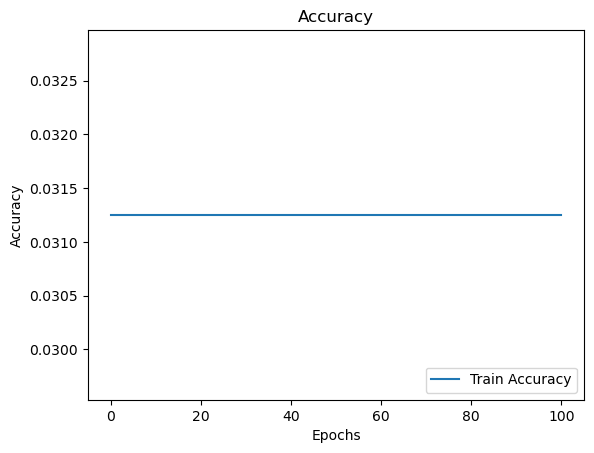

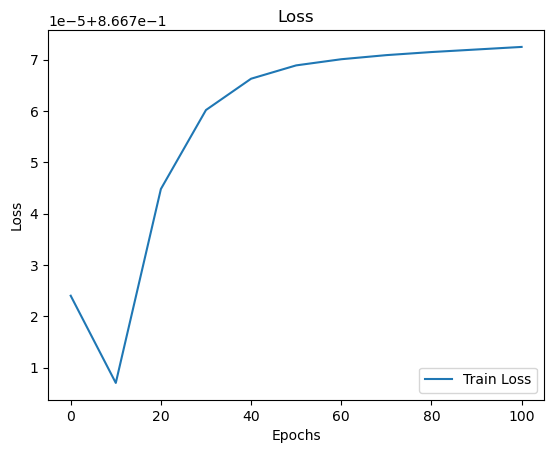

Training of model 11 is over
Average Loss and Average Test Accuracy values of model 11
Average Loss according to Each Epoch:  0.812442022
Average Test Accuracy according to Each Epoch:  0.06666666666666667


╒════════════════════════╤═════════════╤════════════════════╤═════════════════════╕
│ models                 │ model1      │ model2             │ model3              │
╞════════════════════════╪═════════════╪════════════════════╪═════════════════════╡
│ Activation Function    │ ReLU        │ TanH               │ Sigmoid             │
├────────────────────────┼─────────────┼────────────────────┼─────────────────────┤
│ Average Accuracy Value │ 0.649       │ 0.2806666666666667 │ 0.06666666666666667 │
├────────────────────────┼─────────────┼────────────────────┼─────────────────────┤
│ Average Loss Value     │ 0.423025624 │ 0.6810210050000001 │ 0.812442022         │
╘════════════════════════╧═════════════╧════════════════════╧═════════════════════╛



In [9]:
print("Effect of differences of activation function")
print()
model9 = NeuralNetwork(x_train, y_train, n_hidden_layers=2, activation="relu")
print("Training of model 9 begins")
model9.train("Relu Activation")
print("Training of model 9 is over")
print("Average Loss and Average Test Accuracy values of model 9")
loss9, acc9 = model9.test(x_val, y_val)

model10 = NeuralNetwork(x_train, y_train, n_hidden_layers=2, activation="tanh")
print("Training of model 10 begins")
model10.train("Tanh Activation")
print("Training of model 10 is over")
print("Average Loss and Average Test Accuracy values of model 10")
loss10, acc10 = model10.test(x_val, y_val)

model11 = NeuralNetwork(x_train, y_train, n_hidden_layers=2, activation="sigmoid")
print("Training of model 11 begins")
model11.train("Sigmoid Activation")
print("Training of model 11 is over")
print("Average Loss and Average Test Accuracy values of model 11")
loss11, acc11 = model11.test(x_val, y_val)
print()
print()
table = [['models', 'model1', 'model2', 'model3'],
         ['Activation Function', 'ReLU', 'TanH', 'Sigmoid'],
         ['Average Accuracy Value', acc9, acc10, acc11],
         ['Average Loss Value', loss9, loss10, loss11]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))
print()

<h2 style="color: firebrick; font-family: verdana"><b>1.6: Conclusion</b></h2>

<p style="font-family: verdana"><b>Hidden Layer Number:</b> In our first model, we set the number of hidden layers to 1 and 2 in our second model. As we saw from the accuracy values in our code, we've seen that when the number of hidden layers increases, there's an increase in our accuracy value, and we've seen that the loss value has decreased.</p>

<p style="font-family: verdana"><b>Hidden Layer Size:</b> In our first model, we set the hidden layer size equal to 64 and 128 in our second model. We've seen that when the hidden layer size increases, there's an increase in our accuracy value, and a decrease in the loss value.</p>

<p style="font-family: verdana"><b>Batch Size:</b> We've seen that when the batch size increases, there's an increase in our accuracy value, and we've seen that the loss value has decreased.</p>

<p style="font-family: verdana"><b>Activation Function:</b> In our first model, we used ReLU as the activation function, Tanh in the second and sigmoid in the third model. We've seen that the ReLU function gives the highest accuracy and the lowest accuracy values.</p>

<h2 style="color: firebrick; font-family: verdana"><b>1.7: The Best Model</b></h2>

According to best consequences, the final best model is


Training of model 12 begins
#################################
Epoch 0 / 100
loss  1.7331848
training accuracy:  0.0625
Precision Score:  0.7847104917417417
Recall Score:  0.0625
F1 Score:  0.025578861927546135
#################################
Epoch 10 / 100
loss  1.5577684
training accuracy:  0.171875
Precision Score:  0.4665538594470046
Recall Score:  0.171875
F1 Score:  0.1378739316239316
#################################
Epoch 20 / 100
loss  1.3151739
training accuracy:  0.390625
Precision Score:  0.5697852928321678
Recall Score:  0.390625
F1 Score:  0.3513201208513709
#################################
Epoch 30 / 100
loss  1.1219628
training accuracy:  0.4375
Precision Score:  0.49024152930402926
Recall Score:  0.4375
F1 Score:  0.41583867521367524
#################################
Epoch 40 / 100
loss  0.8496757
training accuracy:  0.609375
Precision Score:  0.6910342261904762
Recall Score:  0.609375
F1 Score:  0.60711580086

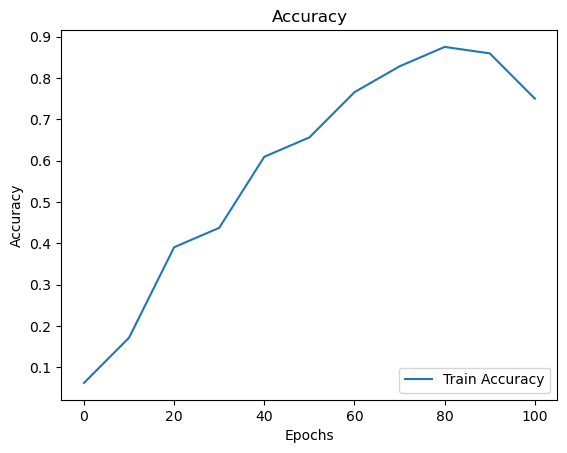

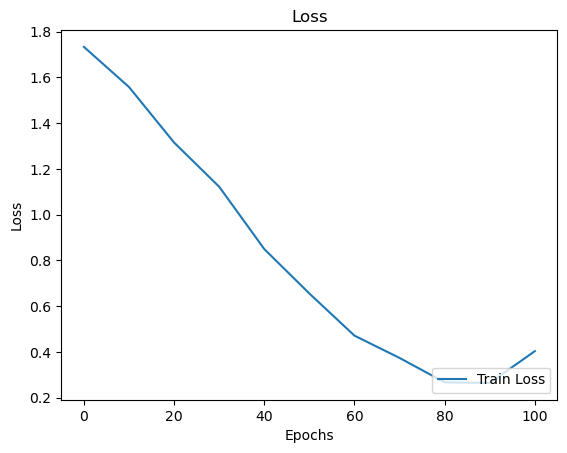

Training of model 12 is over
Average Loss and Average Test Accuracy values of model 12
Average Loss according to Each Epoch:  0.42925454199999996
Average Test Accuracy according to Each Epoch:  0.6243333333333333


(0.42925454199999996, 0.6243333333333333)

In [10]:
print("According to best consequences, the final best model is")
print()
print()
model12 = NeuralNetwork(x_train, y_train, n_hidden_layers=2, batch_size=64, size_hidden_layer=128, activation="relu")
print("Training of model 12 begins")
model12.train("Batch S. = 64, Layer S. = 128, Activation = Relu")
print("Training of model 12 is over")
print("Average Loss and Average Test Accuracy values of model 12")
model12.test(x_val, y_val)